## Data Visualization with python

<a href="https://matplotlib.org/">Matplotlib</a> is one of the most popular and widely-used data visualization libraries for Python. Matplotlib was inspired by the plotting functionalities of MATLAB (a non-open source programming language). It provides a comprehensive set of tools for creating a variety of plot types, such as line plots, scatter plots, bar plots, histograms, heatmaps, and many more. 

In this session we will generate and plot some artificial data and data contained in our pandas DataFrames using pyplot. We will go through the main matplotlib concepts and we will generate several kinds of plots to illustrate matplotlib and pyplot potential.

## Preliminaries

We begin importing the pandas package in the same way we did in previous sessions:

In [1]:
import pandas as pd

The first thing to do to start visualizing data with python is importing the module `pyplot` from the `matplotlib` library. As with many of our previous imports, we import the module under an 'alias' (alternate shorter name) for convenience. Finally, we specify the command `%matplotlib inline` so that, when plotting, Jupyter Notebook will not display the plots into new windows, but in the notebook itself.

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

## Histograms

In the first example we will generate some artificial data by generating 10000 normally distributed values. In order to obtain that, we will first import the package `numpy`, a package used for scientific computing and data analysis. In particular, the sub-package `numpy.random` contains very handy tools to work with random numbers and its function `.normal()` generates normally distributed random numbers.

In [3]:
import numpy as np
sample_data = np.random.normal(0, 0.1, 10000)

In this case we are drawing 10000 points with 0 average and a standard deviation of 0.1. First we will use the ```pyplot``` function `hist()` to visualize a histogram of our data:

(array([  15.,  166.,  775., 2036., 3092., 2466., 1118.,  289.,   38.,
           5.]),
 array([-0.36288553, -0.28519033, -0.20749513, -0.12979993, -0.05210473,
         0.02559047,  0.10328567,  0.18098087,  0.25867607,  0.33637127,
         0.41406647]),
 <BarContainer object of 10 artists>)

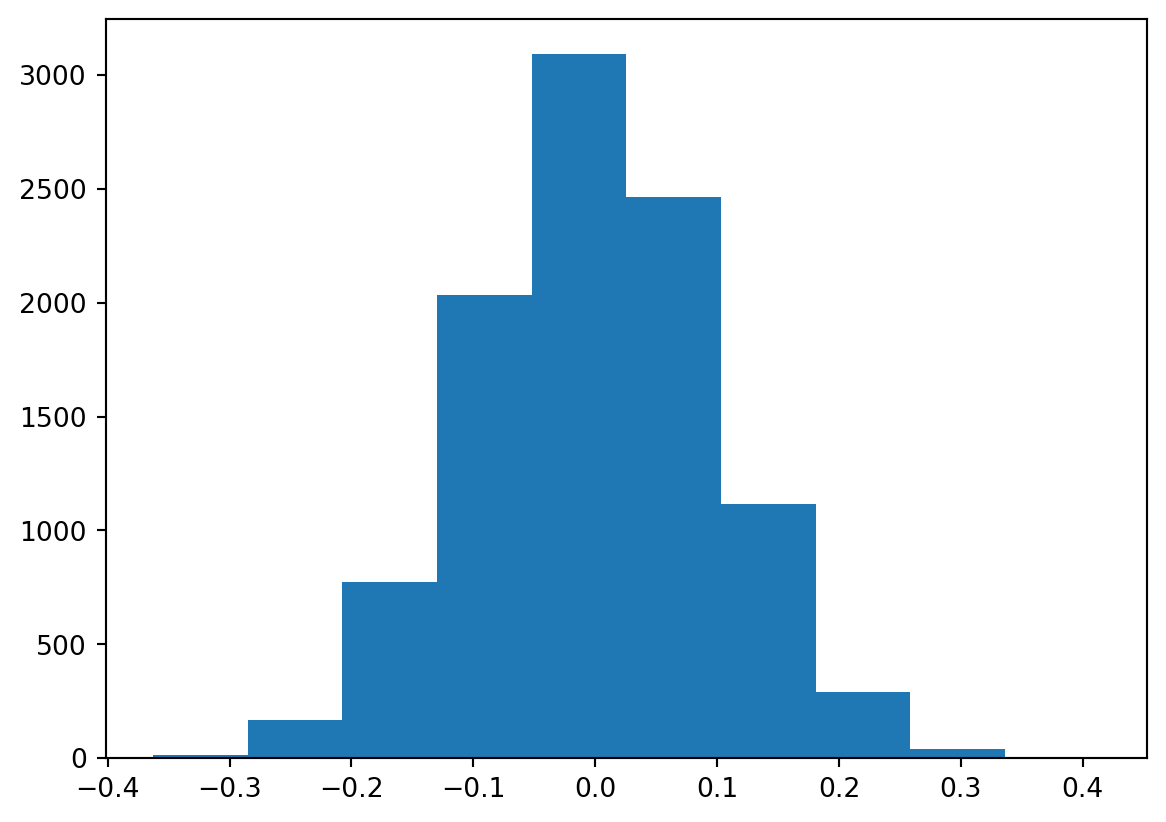

In [4]:
plt.hist(sample_data)

As we expected, the histogram is centered around 0 and we can already see the bell shape arising among the blocks. The default values of histogram bins (blocks) is 10, so in our case 10000 points are subdivided into 10 bins, but we can change that by specifying the parameter `bins`:

(array([   4.,    2.,    9.,   24.,   42.,  100.,  151.,  259.,  365.,
         498.,  681.,  857.,  984., 1061., 1047.,  961.,  821.,  684.,
         495.,  381.,  242.,  149.,   96.,   44.,   22.,    9.,    7.,
           0.,    2.,    3.]),
 array([-3.62885528e-01, -3.36987129e-01, -3.11088729e-01, -2.85190329e-01,
        -2.59291929e-01, -2.33393529e-01, -2.07495130e-01, -1.81596730e-01,
        -1.55698330e-01, -1.29799930e-01, -1.03901530e-01, -7.80031307e-02,
        -5.21047309e-02, -2.62063311e-02, -3.07931324e-04,  2.55904685e-02,
         5.14888683e-02,  7.73872681e-02,  1.03285668e-01,  1.29184068e-01,
         1.55082467e-01,  1.80980867e-01,  2.06879267e-01,  2.32777667e-01,
         2.58676067e-01,  2.84574466e-01,  3.10472866e-01,  3.36371266e-01,
         3.62269666e-01,  3.88168066e-01,  4.14066465e-01]),
 <BarContainer object of 30 artists>)

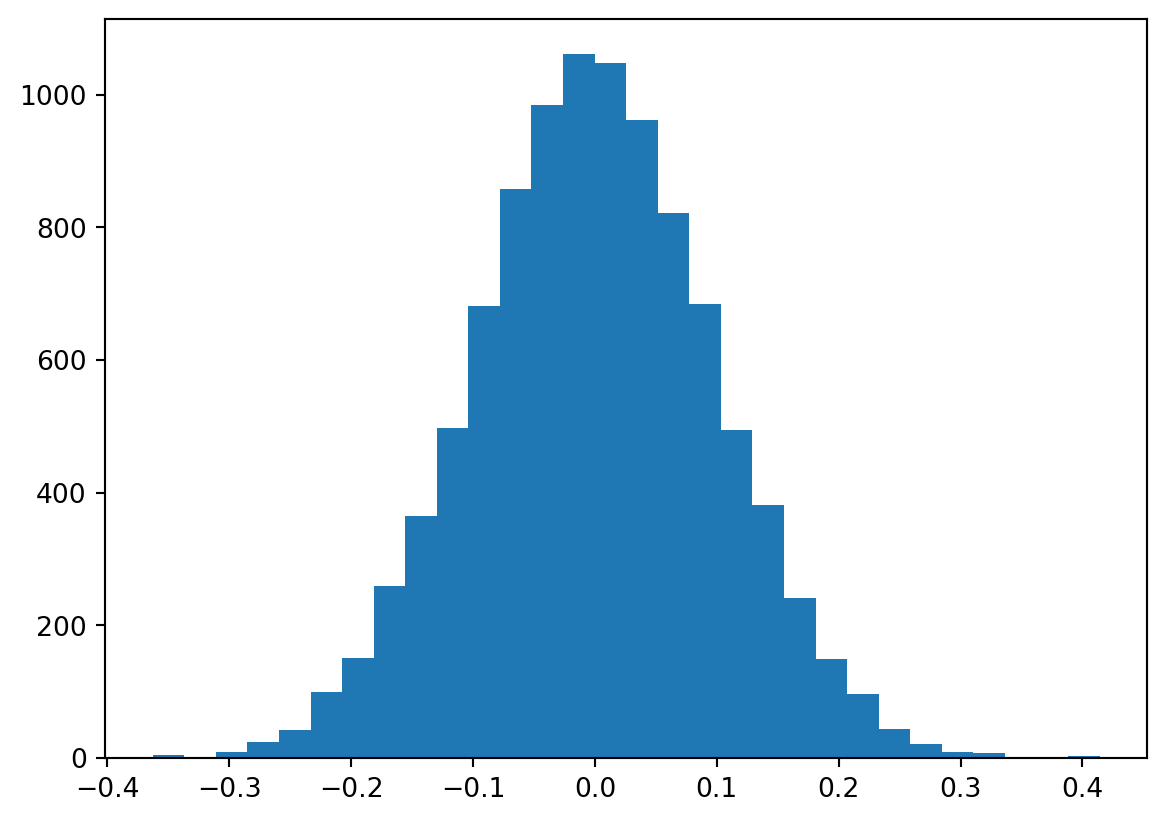

In [5]:
plt.hist(sample_data, bins=30)

You may have noticed that increasing the number of bins, the bell shape of the histogram is even more evident.

## Customizing plots

In the previous examples we generated very simple plots to have a quick look at the data, either from an existing pandas DataFrame or working with artificial data. However, with Matplotlib you can customize many more aspects of your plot: axes, x and y ticks and labels, titles, legends, and much more.

To get full control of the plots generated with `Matplotlib.pyplot`, it is important to be aware of jargon used to describe different parts of the figures that you create. 

- At the higher level we have **Figures**. A Figure is simply the total white space where you will organise your plots. You may think of it as the white page were you are going to draw your plots or also as a box containing all your plots. You can both have a single plot per Figure or multiple plots sharing the same Figure
- At a lower level we have **Axes**. Axes are contained into Figures. Axes is the name for a single plot or graphs (which may be a bit confusing since it can be mistaken for the x axis and y axis of a plot). You can have a single Axes per Figure, so one plot per Figure (see Plot1 on the left of the figure below) or multiple Axes per Figure, like in Plot2 (on the right) where the same Figure contains three plots distributed in two rows: two on top and one on the bottom
- Finally, each Axes (aka each plot) contains two **Axis**, i.e. x and y axis.

To summarize, `matplotlib` organizes plots into Figures, Axes, and Axis. A Figure is a canvas that can contain one or more Axes. An Axes is where data is plotted and it is made of two Axis, x and y. Specifying parameters at these three different levels, you can customize your plots to the finest details.

![Plot Hierarchy](images/plot_hierarchy.jpeg)

Certain attributes like the Figure size and the number of plots inside the Figure belong to the Figure level. Ticks, labels, plot title, legend, etc belong to the Axes level. Data is plotted on Axes according to the specified x and y Axis. The main features of a "typical" plot generated with `matplotlib` are well summarized by the picture below from matplotlib documentation:

<div style="text-align:center">
    <img src="images/anatomy.jpeg" alt="Plot Main Features" width="70%" />
</div>

## Customizing titles and labels

To add labels to the axis of a plot, we first create a figure containing 1 Axes (or one plot named `ax`). Then we use `ax.set_xlabel('<label>')` and `ax.set_ylabel('<label>')` to specify the axis labels. We can add a title to the figure using `fig.suptitle('<title>')`

Text(0.5, 0.98, 'Histogram')

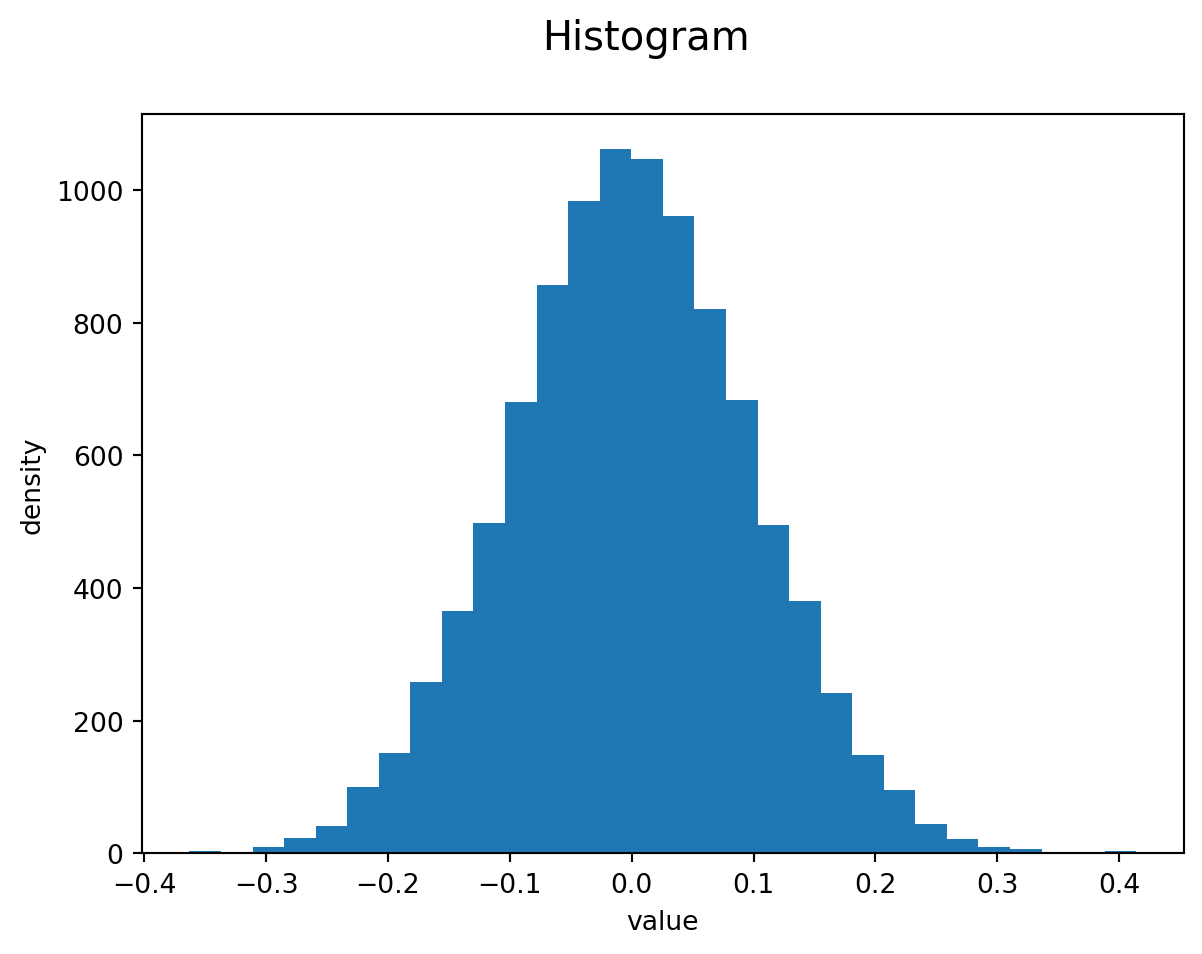

In [6]:
fig, ax = plt.subplots() # prepare a matplotlib figure
ax.hist(sample_data, bins=30)

# add labels

ax.set_ylabel('density')
ax.set_xlabel('value')
fig.suptitle('Histogram', fontsize=15)

Note: To plot data on our Axes we used the same plotting methods used in the previous examples. We used ```hist()``` sampling the data in 30 bins, but this time we had to call the function from the Axes object, so ```ax.hist()```.

## Creating subplots

If we want to create a figure that consists of multiple subplots we can use the ```plt.subplots()``` functions. The first two arguments indicate the number of vertical and horizontal plots we want to fit in our Figure. In this case, we will create two plots side to side, so our grid will have one row and two columns. As we want to be sure that there will be enough space for our two plots, we specify the size of the Figure to be 12 inches long and 6 inches high (inches is the default size unit, but you can specify different ones).

In this case our settings produced plots distributed in one row and two columns, so a total of 2 plots, therefore ```plt.subplots()``` will return 2 Axes objects in a tuple. We will store these two Axes into the variables ax1 and ax2.

Text(0.5, 0, 'value')

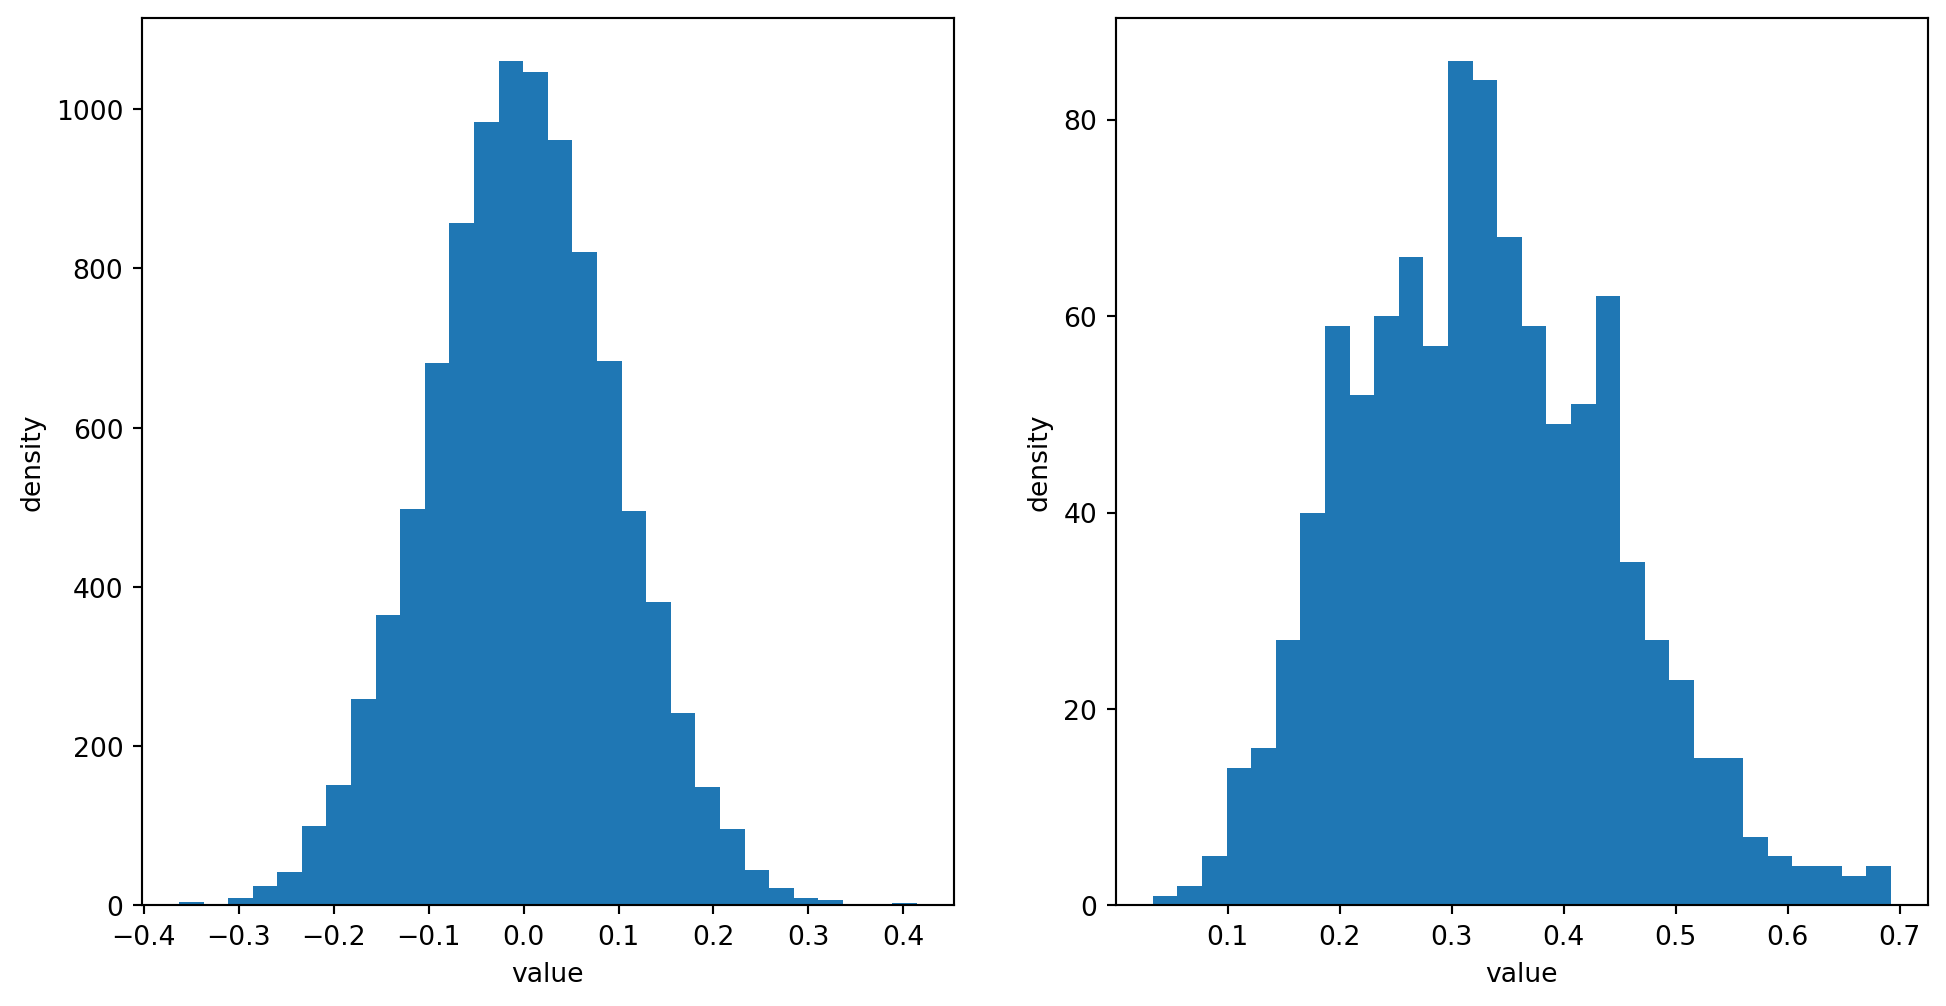

In [7]:
# prepare a matplotlib figure
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(12,6))
ax1.hist(sample_data, bins=30)
# add labels
ax1.set_ylabel('density')
ax1.set_xlabel('value')

# define and sample beta distribution
a = 5
b = 10
beta_draws = np.random.beta(a, b, 1000)

# plot beta distribution
ax2.hist(beta_draws, bins=30)
ax2.set_ylabel('density')
ax2.set_xlabel('value')

Instead of plotting side by side, it is also possible to add a plot inside (or actually overlaying another plot).

In order to do this we can initiate at a Figure and an Axes (the plot to put inside it), using ```plt.subplots()```, without specifying any argument (so without specifying the number or rows and columns), the method will return a Figure and a single Axes object. We will assign these two python objects to the variables *fig* and *ax*.

(array([   4.,    2.,    9.,   24.,   42.,  100.,  151.,  259.,  365.,
         498.,  681.,  857.,  984., 1061., 1047.,  961.,  821.,  684.,
         495.,  381.,  242.,  149.,   96.,   44.,   22.,    9.,    7.,
           0.,    2.,    3.]),
 array([-3.62885528e-01, -3.36987129e-01, -3.11088729e-01, -2.85190329e-01,
        -2.59291929e-01, -2.33393529e-01, -2.07495130e-01, -1.81596730e-01,
        -1.55698330e-01, -1.29799930e-01, -1.03901530e-01, -7.80031307e-02,
        -5.21047309e-02, -2.62063311e-02, -3.07931324e-04,  2.55904685e-02,
         5.14888683e-02,  7.73872681e-02,  1.03285668e-01,  1.29184068e-01,
         1.55082467e-01,  1.80980867e-01,  2.06879267e-01,  2.32777667e-01,
         2.58676067e-01,  2.84574466e-01,  3.10472866e-01,  3.36371266e-01,
         3.62269666e-01,  3.88168066e-01,  4.14066465e-01]),
 <BarContainer object of 30 artists>)

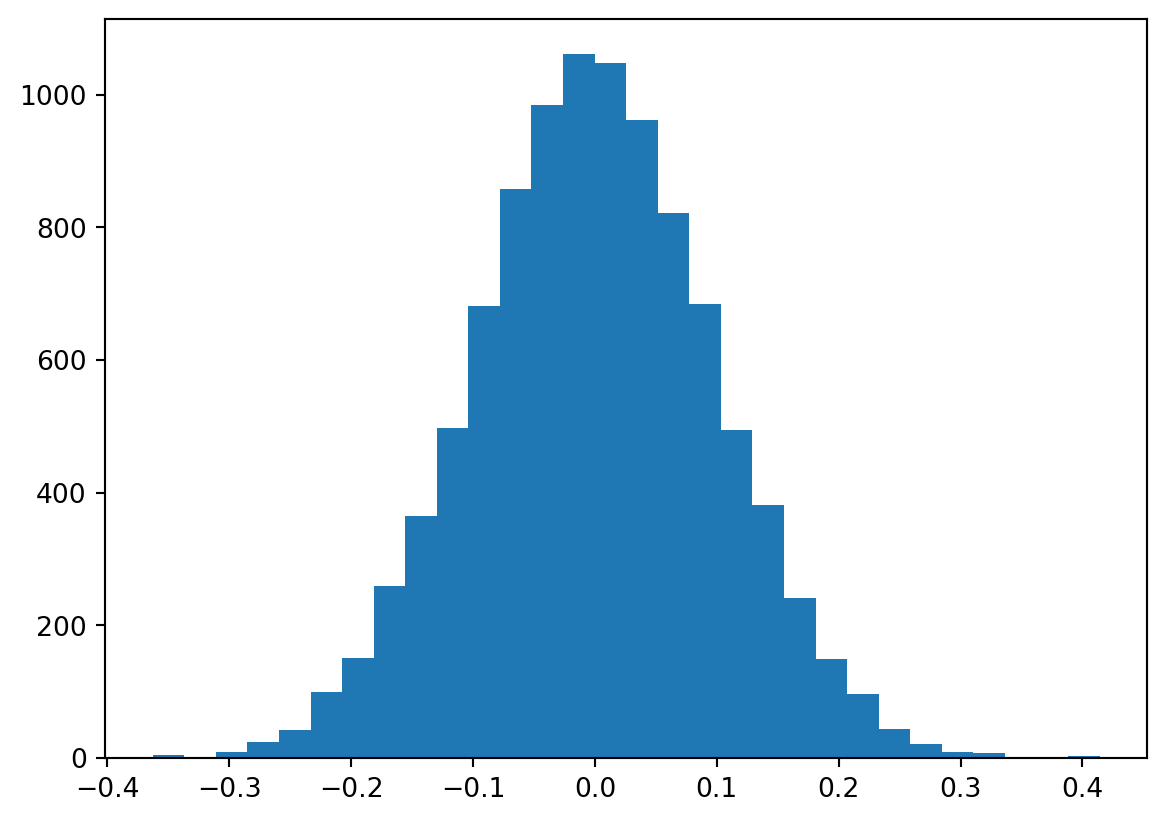

In [8]:
fig, ax = plt.subplots()  # initiate an empty figure and axis matplotlib object
ax.hist(sample_data, bins= 30)

Once we defined a Figure and an Axes, we can add other Axes to our Figure using ```fig.add_axes([left,bottom,length,height])``` where the argument is a list containing the coordinates of our new Axes in the following format: [left edge, bottom edge, length, and height]. The left edge and bottom edgeare scaled from 0 to 1, so that 0.5 corresponds to the center of the Figure. For example, the list of coordinates [0.5,0.5,0.33,0.33] will locate the bottom-left corner of our additional Axis at the very center of the Figure. The new plot will be as wide as ~1/3 of the length of the Figure and as high as ~1/3 of the height of the Figure.

(array([ 1.,  2., 10.,  9., 22., 30., 39., 59., 61., 67., 70., 66., 77.,
        81., 73., 68., 64., 45., 35., 32., 21., 21., 16., 10.,  7.,  6.,
         4.,  1.,  1.,  2.]),
 array([0.0387968 , 0.06179044, 0.08478408, 0.10777772, 0.13077136,
        0.153765  , 0.17675864, 0.19975228, 0.22274592, 0.24573956,
        0.2687332 , 0.29172684, 0.31472048, 0.33771412, 0.36070776,
        0.3837014 , 0.40669504, 0.42968868, 0.45268232, 0.47567597,
        0.49866961, 0.52166325, 0.54465689, 0.56765053, 0.59064417,
        0.61363781, 0.63663145, 0.65962509, 0.68261873, 0.70561237,
        0.72860601]),
 <BarContainer object of 30 artists>)

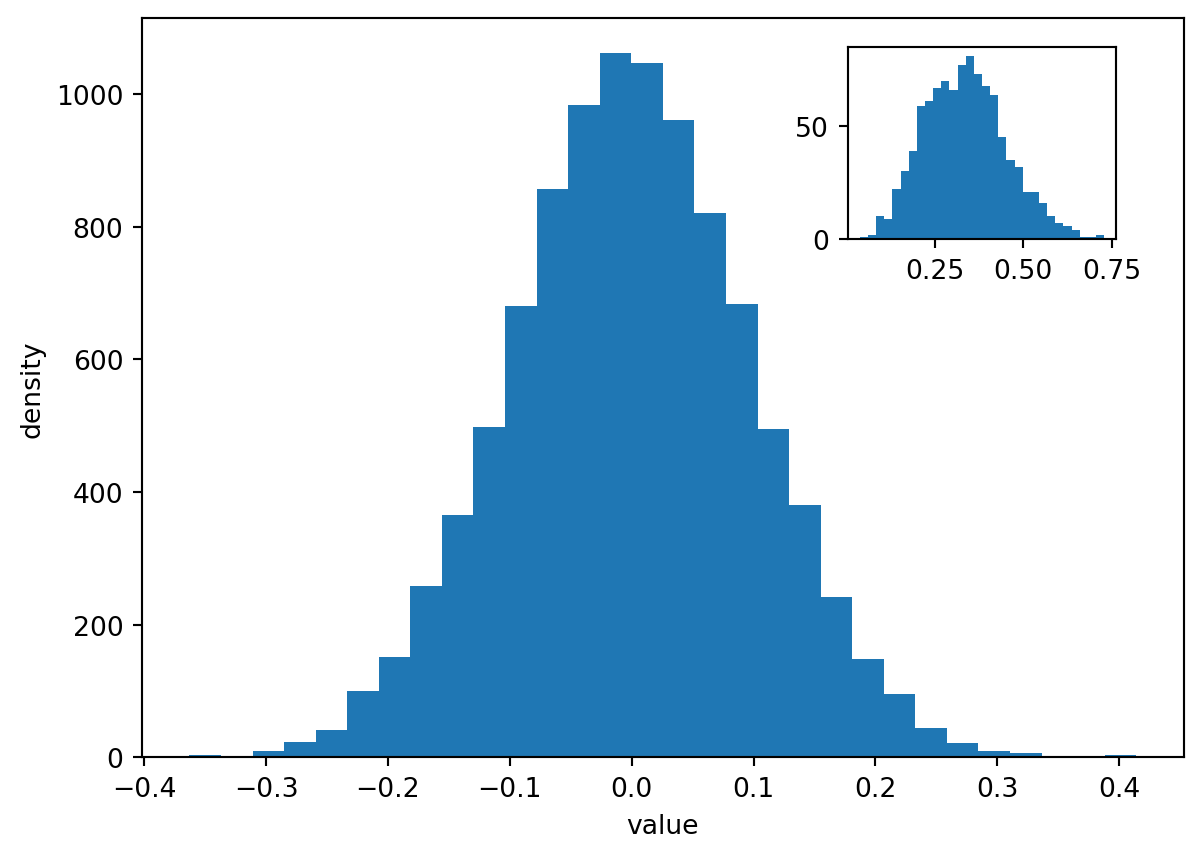

In [9]:
# prepare a matplotlib figure
fig, ax1 = plt.subplots()
ax1.hist(sample_data, 30)
# add labels
ax1.set_ylabel('density')
ax1.set_xlabel('value')

# define and sample beta distribution
a = 5
b = 10
beta_draws = np.random.beta(a, b, 1000)

# plot beta distribution
# by adding additional axes to the figure
ax2 = fig.add_axes([0.65, 0.65, 0.2, 0.2])
#ax2 = fig.add_axes([left, bottom, right, top])
ax2.hist(beta_draws, bins=30)

 ```plt.subplots()``` parameters allow you to specify all sort of plot features: the size of the Figure in inches or cm, the number of plots to display in the Figure arranged in rows and columns, whether the subplots need to share the same axis, etc. The [Matplotlib documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html) provides all the information and examples.

## Plotting grouped data

Now we will go back to the surveys dataset from the previous chapters:

In [10]:
surveys = pd.read_csv(('../course_materials/data/surveys.csv'))

In [11]:
surveys

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
0,1,7,16,1977,2,NL,M,32.0,NaN
1,2,7,16,1977,3,NL,M,33.0,NaN
2,3,7,16,1977,2,DM,F,37.0,NaN
3,4,7,16,1977,7,DM,M,36.0,NaN
4,5,7,16,1977,3,DM,M,35.0,NaN
...,...,...,...,...,...,...,...,...,...
35544,35545,12,31,2002,15,AH,NaN,NaN,NaN
35545,35546,12,31,2002,15,AH,NaN,NaN,NaN
35546,35547,12,31,2002,10,RM,F,15.0,14.0
35547,35548,12,31,2002,7,DO,M,36.0,51.0


Now first, let's create a scatterplot where we plot the `weight` as a function of `hindfoot_length`:

Text(0.5, 0.98, 'Scatter plot of weight versus hindfoot length')

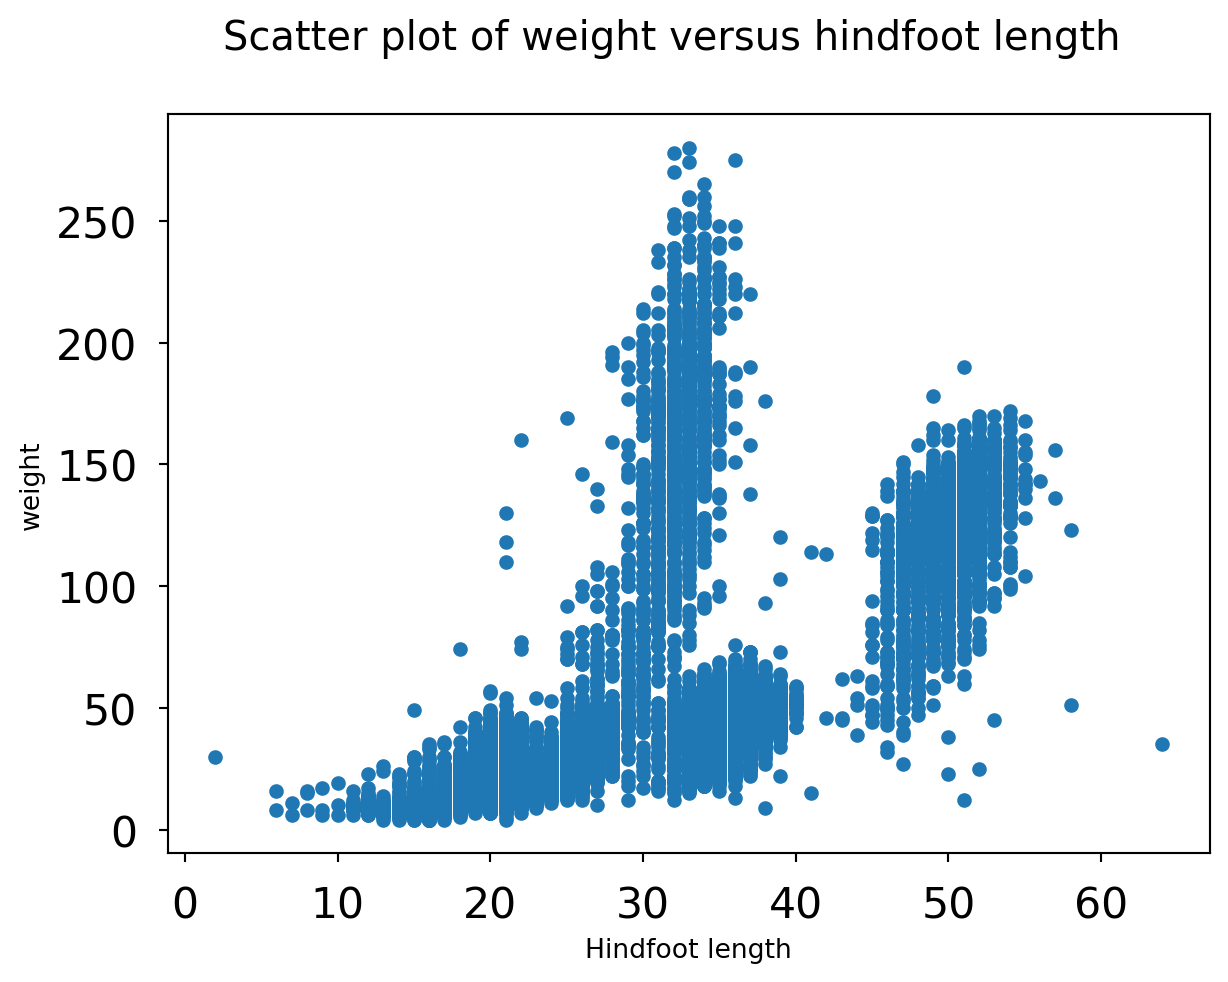

In [12]:
fig, ax1 = plt.subplots() # prepare a matplotlib figure

surveys.plot("hindfoot_length", "weight", kind="scatter", ax=ax1)

# Provide further adaptations with matplotlib:
ax1.set_xlabel("Hindfoot length")
ax1.tick_params(labelsize=16, pad=8)
fig.suptitle('Scatter plot of weight versus hindfoot length', fontsize=15)

<div class="alert alert-block alert-success">
<b>Exercise 13</b>
    
Now go to the Jupyter Dashboard in your internet browser and continue with exercise 13.
</div>

If we want to see if this distribution is different between males and females we can use a for loop and the groupby method to overlay two plots on top of each other in the same Axes object.

Text(0, 0.5, 'Weight')

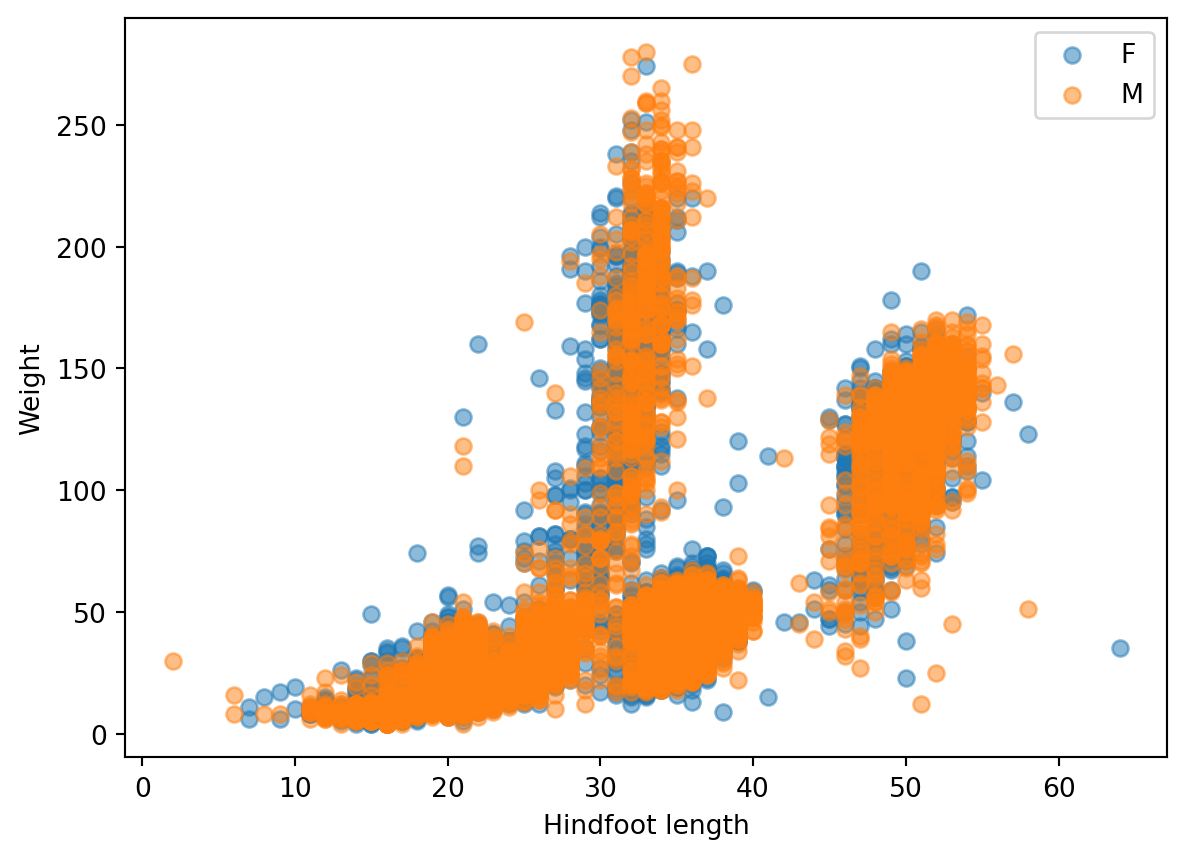

In [13]:
fig, ax = plt.subplots()
labels = []

for i, group in list(surveys.groupby('sex')):
    ax.scatter(group['hindfoot_length'], group['weight'], alpha=0.5)
    labels.append(group['sex'].iloc[0])
    
ax.legend(labels)
ax.set_xlabel("Hindfoot length")
ax.set_ylabel("Weight")


By using `ax.scatter` 2 times inside the for loop, the two sets of points end up in the same **Axes**. Automatically the groups get different colors. With `alpha=0.5` we can make the dots semi transparent so we can see them a bit better (however due to the large number of dots many blue dots are probably still hidden). We need to add the legend afterwards (after the for loop), but we do need the provide the labels in a list. We generated the list of labels in the for loop to make sure we don't mix them up by accident.

Perhaps we get a better view if we plot them in separate subplots, which is the next exercise:

<div class="alert alert-block alert-success">
<b>Exercise 14</b>
    
Now go to the Jupyter Dashboard in your internet browser and continue with exercise 14.
</div>

### Saving your plot

Once you produced your plot you will probably need to share it in different media (website, papers, slide show, etc). To do that, we need to save our plot in a specific format. Once you have defined a Figure, you can do that with a single line of code:

In [14]:
fig.savefig('MyFigure.png', dpi=200)

The Figure method ```savefig()``` will save your figure into a file. The first argument of the function is the name of the output file. Matplotlib will automatically recognize the format of the output file from its name. If you will specify only a name without extention, you can indicate the format explicitly with the parameter *format*. We also need to specify the dpi (dots per inch), i.e. the quality of the picture. The quality of the picture depends on the media we want to use. 200 dpi is good enough for visualization on a screen.

### What's next?

As we mentioned in the introduction, matplotlib library is huge and you can customize every single little feature of your plot. With matplotlib you can also create animations and 3D plots. Now that you know the basics of plotting data, have a look at the <a href="https://matplotlib.org/2.0.2/gallery.html">matplotlib gallery</a> to check the huge variety of plots you can generate with matplotlib.

This was the last chapter of this course!
Go to [What is next after this course](what-next.qmd), for tips on how to get started with Python in your own project!